In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

In [36]:
def fetch_Data() :
    data = pd.read_csv("/Users/leoadlakha/Documents/Research Work/TDTVD/csv/data.csv")
    data = data.iloc[:, 2:]
    y = data.iloc[:, 0]
    y = np.array(y)
    for i in range(len(y)) :
        if y[i] == 'Forged' :
            y[i] = 1 
        else :
            y[i] = 0 
    Y = y.astype('int')
    x = data.iloc[:, 1:]
    X = []
    for i in range(len(x)) :
        X.append(np.array(x.iloc[i, :]))
    return X, Y

In [37]:
def performScaling(scaling_type, X) :
    scalar = None
    if scaling_type == 'standard' :
        scaler = StandardScaler()
    else :
        scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X

In [58]:
X, Y = fetch_Data()
X, Y

([array([175, 210, 210, 771, 175, 191, 236, 214, 235, 213, 222, 203, 340,
         237, 200, 182, 197, 180, 232, 204, 180, 388, 163, 192, 206, 209,
         222, 202, 184, 165, 347, 212, 197, 218, 167, 200, 177, 227, 199,
         374, 202, 238, 216, 199, 261, 206, 205, 237, 455, 218, 247, 221,
         260, 289, 267, 274, 262, 445, 301, 259, 219, 247, 266, 327, 332,
         271, 502, 338, 289, 355, 335, 413]),
  array([ 384,  300,  316, 1121,  265,  343,  358,  380,  336,  293,  295,
          323,  453,  308,  350,  290,  244,  339,  305,  310,  223,  456,
          261,  243,  227,  257,  278,  218,  218,  205,  429,  143,  184,
          148,  231,  168,  200,  177,  195,  442,  194,  161,  198,  203,
          223,  202,  194,  160,  380,  134,  196,  173,  179,  205,  185,
          166,  167,  279,  107,  173,  175,  169,  153,  148,  148,  146,
          315,  129,  165,  163,  144,  136]),
  array([128, 159, 135, 686, 118, 128, 162, 136, 144, 167, 181, 102, 259,
         149,

In [59]:
X = performScaling("MinMax", X)

In [40]:
X

array([[ 0.54760827,  0.75743231, -0.27671396, ...,  3.15048386,
         3.32030468,  3.88908441],
       [ 2.77715624,  2.1058283 , -0.03269752, ...,  0.02172747,
        -0.05830843,  0.0222322 ],
       [ 0.04622667, -0.00665875, -0.4493671 , ...,  0.24986596,
         0.94996878,  0.24558829],
       ...,
       [-0.61517033, -0.89060723, -0.36879564, ..., -1.20044299,
        -1.08427471, -0.39656045],
       [-0.64717341, -0.4411419 , -0.45627323, ..., -0.49973192,
        -1.38498897, -0.21508364],
       [-0.31647491, -0.95053594, -0.36419155, ..., -0.36936707,
        -0.50053528, -1.10850797]])

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, shuffle = True)

In [134]:
clf = KNeighborsClassifier(n_neighbors=7)

In [135]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [136]:
clf.score(x_test, y_test)

0.8181818181818182

In [155]:
# General Way to find Optimal K
x_axis = []
y_axis = []
y_axis_2 = []
for i in range(1, 26, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train)
    score = cross_val_score(clf, x_train, y_train, cv = KFold(4, True, 0))
    x_axis.append(i)
    y_axis.append(score.mean())
    y_axis_2.append(clf.score(x_test, y_test))

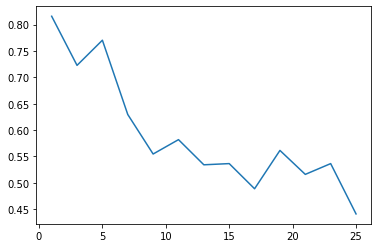

In [156]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.show()